# Prosper平台业务分析及风险控制


此项目既包括业务趋势分析也包括客户分析，以及对风控问题的处理，所用到的分析思想和分析方法可扩展到多平台，具有现实意义。


分析思路如下：

背景分析-->目标确定-->数据清洗-->EDA-->数据预处理-->模型建立和评估。

主要解决了以下问题：

1. 贷款人数与贷款金额变化趋势分析：Prosper业务总体呈上升趋势，但受政策等因素影响较大，具有波动性
2. 信用评级与贷款利率分析：实施差异化利率政策--不同评级享受不同贷款利率，评级越高利率越低
3. 每笔贷款金额分析：主要以小额贷款业务为主，每笔贷款额度与总体业务关系密切
4. 贷款金额与时间关系分析：贷款业务主要集中于年初和年末，公司可采取相应措施促增长
5. 违约趋势变化比例分析：违约比例较高，此因素是影响次年的业务增长的主要因素之一
6. 信用评级，征信次数，收入范围这些是判断客户是否违约的重要指标
7. 雇佣时间，雇佣状态，是否有放等对客户是否违约影响不大
8. 构建模型预测用户是否会违约，可提高风控能力

所用数据来源于kaggle上的Prosper2005~2014的数据。

——————————————————————————————————————————————————————————————————————————————————————————————

## 一. 背景和目标设定

### 背景
行业相关背景：

互联网技术的发展，为金融创新提供了条件。其中,网络借贷就是资金借贷活动借助互联网平台而实现的一种去中介化的模式创新。作为网贷平台的主要形式,P2P平台通过直接撮合借贷双方,改变了传统商业银行作为资金融通中介的借贷模式。

p2p借贷是指不需要以银行等传统金融机构为中介，借贷双方直接通过网络平台交易的无担保借贷、借款人可以以低于银行贷款利息快捷方便借到钱而放款人可以获得高于银行存款的利息。

2005年3月,英国Zopa的成立标志着P2P融资模式的形成,之后美国相继出现了Prosper和Lending Club等P2P平台公司，目前国内出现了宜信、拍拍贷、人人贷等网络借贷平台。而Prosper作为此次研究的重点,本项目选取了该公司自2006年至2014年总共11W左右的贷款数据,进行EDA,分析Prosper贷款人特点和质量,贷款资金价格界定规则等问题。

prosper相关背景：

prosper贷款条件:
贷款申请的合格标准为：1）在过去6个月内，少于7个信用局查询了申请人的信用信息；2）申请人自己声明有正的收入；3）债务收入比低于50%；4）在信用局报告上至少有3笔公开交易；5）在过去12个月内无申请破产。此外，第一次在平台出借的申请人需要有不低于640分的信用分数。

事件:2008年11月24日，SEC判定Prosper违反了《1933年证券法》，要求Prosper暂定运营。经审查后，考虑P2P借贷模型的特性，SEC将所有P2P借贷定义为债券销售，要求所有P2P企业都在SEC登记注册。2008年11月26日，加州最高法院对Prosper提起集体诉讼，控告Prosper违反加州和联邦法律发行和出售未认证和注册的证券。诉讼寻求类认证、损害、撤销权和律师费。Prosper的保险商Greenwhich保险公司拒绝给予赔偿，表示这类事件不包含在保险政策中。2009年7月，Prosper的贷款在获得SEC的注册后，重新开发了网站。但重新开业后，竞标贷款限制在美国28个州和哥伦比亚地区的居民。有47个州的居民可以再Prosper上借款，另外三个州（Iowa、Maine、North Dakota）则不允许。

### 目标

1. 提升平台业务能力：

了解prosper平台的业务特征，以及影响业务的相关因素，能通过对相关因素的改变而提升整体业务。

2. 提高平台风控能力：

通过区分是否违约的客户特点，可以预测出什么样的客户能正常完成还款，帮助平台辨别可以借贷的客户。



## 二.数据清洗

### 下图为各特征变量的描述信息

![png](VariableDefinitions.png)
![png](VariableDefinitions02.png)


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('prosperLoanData.csv')
pd.set_option("display.max_columns", len(df.columns))
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [3]:
df.shape

(113937, 81)

有113937个样本数据，81个特征变量。
——————————————————————————————————————————————————————
### 1. 重复值检测

In [4]:
df.duplicated().sum()

0

-----------------------------------------
### 2. 缺失值处理

In [5]:
missing=pd.concat([df.isnull().any(),df.count()],axis=1)
column=['是否缺失','非缺失数量']
missing=pd.DataFrame(list(missing.values),index=list(missing.index),columns=column)
total = len(df)
print(total)
missing['缺失数量']=total-missing['非缺失数量']
missing['缺失率%']=missing['缺失数量']/total*100
miss=missing[missing['缺失数量']>0]
print(miss)
print('-------')
print('缺失特征变量共有{}个'.format(len(miss)))

113937
                                     是否缺失   非缺失数量    缺失数量       缺失率%
CreditGrade                          True   28953   84984  74.588588
ClosedDate                           True   55089   58848  51.649596
BorrowerAPR                          True  113912      25   0.021942
EstimatedEffectiveYield              True   84853   29084  25.526387
EstimatedLoss                        True   84853   29084  25.526387
EstimatedReturn                      True   84853   29084  25.526387
ProsperRating (numeric)              True   84853   29084  25.526387
ProsperRating (Alpha)                True   84853   29084  25.526387
ProsperScore                         True   84853   29084  25.526387
BorrowerState                        True  108422    5515   4.840394
Occupation                           True  110349    3588   3.149109
EmploymentStatus                     True  111682    2255   1.979164
EmploymentStatusDuration             True  106312    7625   6.692295
GroupKey                   

In [6]:
# 缺失率较低的
miss[(miss['缺失率%']<10) & (miss['缺失率%']>5)]

,是否缺失,非缺失数量,缺失数量,缺失率%
EmploymentStatusDuration,True,106312,7625,6.692295
CurrentCreditLines,True,106333,7604,6.673864
OpenCreditLines,True,106333,7604,6.673864
AmountDelinquent,True,106315,7622,6.689662
PublicRecordsLast12Months,True,106333,7604,6.673864
RevolvingCreditBalance,True,106333,7604,6.673864
BankcardUtilization,True,106333,7604,6.673864
AvailableBankcardCredit,True,106393,7544,6.621203
TotalTrades,True,106393,7544,6.621203
TradesNeverDelinquent (percentage),True,106393,7544,6.621203


In [7]:
# 缺失率很低的
miss[miss['缺失率%']<5]

,是否缺失,非缺失数量,缺失数量,缺失率%
BorrowerAPR,True,113912,25,0.021942
BorrowerState,True,108422,5515,4.840394
Occupation,True,110349,3588,3.149109
EmploymentStatus,True,111682,2255,1.979164
CreditScoreRangeLower,True,113346,591,0.518708
CreditScoreRangeUpper,True,113346,591,0.518708
FirstRecordedCreditLine,True,113240,697,0.611742
TotalCreditLinespast7years,True,113240,697,0.611742
InquiriesLast6Months,True,113240,697,0.611742
TotalInquiries,True,112778,1159,1.017229



#### 缺失原因分析
1. 2009年7月后Prosper做了重大调整，以下这些都是调整之后才有的评估指标，因此2009年7月前的贷款是没有这些指标的

   EstimatedEffectiveYield              True   84853   29084  25.526387

   EstimatedLoss                        True   84853   29084  25.526387

   EstimatedReturn                      True   84853   29084  25.526387

   ProsperRating (numeric)              True   84853   29084  25.526387

   ProsperRating (Alpha)                True   84853   29084  25.526387

   ProsperScore                         True   84853   29084  25.526387

2. 2009年7月后Prosper做了重大调整，以下是调整之后就取消的评估指标

   CreditGrade                          True   28953   84984  74.588588

3. 除了公司内部的指标调整造成大量数据缺失之外，还有一个重要的原因就是：客户申请贷款时候的信息是由客户自己填写的，并不是所有客户都会填写所有的信息，因此造成缺失。

4. 信息采集的渠道或方式不同，在建立信用档案时，往往不只一份调查问卷，不是每个用户都填写过相同的调查问卷。

5. 数据中又一部分缺失比例特别大的：
"TotalProsperLoans","TotalProsperPaymentsBilled", "OnTimeProsperPayments", "ProsperPaymentsLessThanOneMonthLate",
"ProsperPaymentsOneMonthPlusLate", "ProsperPrincipalBorrowed", "ProsperPrincipalOutstanding"。
这部分主要与借款人在Prosper借贷的历史相关，如果借款人之前没有相关记录，就以null的形式存在。因此这部分数据的缺失属于“故意”缺失。

#### 缺失值处理

1. 缺失率较小，根据不同特征的相关性进行填补，利用相关公式，通过其他特征变量的值推测这个特征变量的值。

2. 对于缺失率较小而且不具规律性的特征变量值，使用中值进行填补。

3. 有缺失并且与所要分析的问题相关性不大的特征变量，可直接进行删除。

4. 缺失率过大的，不进行填充，否则盲目填充会给模型引入较大噪声值。也可以直接把此特征变量删除。对于那些“故意”缺失的数据，则采用0进行填充。

5. 因政策调整对于在当时不存在的评估指标，缺失值不进行填补。

6. 对于非数值型变量，可采用Unknown填充，之所以不进行具体类别填充是因为这些缺失多的样本可能会存在较大的违约率。


#### BorrowerAPR缺失值填充
因为BorrowerRate没有缺失值，同时BorrowerAPR与BOrrowerAPR存在一定程度的相关性：BorrowerAPR = BorrowerRate + fees，fees代表其他费用利率。

In [8]:
borrower_fees = df["BorrowerAPR"] - df["BorrowerRate"]
borrower_fees.median()

0.025019999999999987

In [9]:
df["BorrowerAPR"].fillna(df["BorrowerRate"] + borrower_fees.median(), inplace=True)
df["BorrowerAPR"].isnull().sum()

0

#### DebtToIncomeRatio缺失值填充

In [10]:
df["DebtToIncomeRatio"].fillna(df["MonthlyLoanPayment"] / (df["StatedMonthlyIncome"] + 1), inplace = True)
df["DebtToIncomeRatio"].isnull().sum()

0

#### CreditScoreRangeLower/Upper缺失值填充
信用积分缺失值较少，可以先用中位数填上。

In [11]:
df["CreditScoreRangeLower"].fillna(df["CreditScoreRangeLower"].median(), inplace=True)
df["CreditScoreRangeUpper"].fillna(df["CreditScoreRangeUpper"].median(), inplace=True)
df["CreditScoreRangeLower"].isnull().sum(), df["CreditScoreRangeUpper"].isnull().sum()

(0, 0)

####  InquiriesLast6Months / TotalInquiries缺失值填充
使用中值进行填充。

In [12]:
df["InquiriesLast6Months"].fillna(df["InquiriesLast6Months"].median(), inplace=True)
df["TotalInquiries"].fillna(df["TotalInquiries"].median(), inplace=True)

df["TotalInquiries"].isnull().sum(), df["InquiriesLast6Months"].isnull().sum()

(0, 0)

#### CurrentDelinquencies缺失值填充

In [13]:
df["CurrentDelinquencies"].fillna(df["CurrentDelinquencies"].median(), inplace=True)
df["CurrentDelinquencies"].isnull().sum()

0

#### DelinquenciesLast7Years缺失值填充
使用中值进行填充。

In [14]:
df["DelinquenciesLast7Years"].fillna(df["DelinquenciesLast7Years"].median(), inplace=True)

df["DelinquenciesLast7Years"].isnull().sum()

0

#### 对于那些与分析相关不大的以及缺失率过大的进行删除

In [15]:
df.drop(['GroupKey','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber',], axis=1, inplace=True)
df.drop(['FirstRecordedCreditLine','CurrentCreditLines','OpenCreditLines','PublicRecordsLast10Years','PublicRecordsLast12Months','PublicRecordsLast12Months','TotalCreditLinespast7years'], axis=1, inplace=True)
df.shape

(113937, 72)

#### 对于那些因没有相关历史行为而以null填充的，现以0代替null进行填充

In [16]:
prosper_vars = ["TotalProsperLoans","TotalProsperPaymentsBilled", "OnTimeProsperPayments", "ProsperPaymentsLessThanOneMonthLate",
                "ProsperPaymentsOneMonthPlusLate", "ProsperPrincipalBorrowed", "ProsperPrincipalOutstanding"]
df[prosper_vars] = df[prosper_vars].fillna(0)

#### 对非数值型变量缺失值处理
这里之所以不进行具体类别填充而是使用Unknown，是因为这些缺失多的样本可能会存在较大的违约率

In [17]:
categorical = df.select_dtypes(include=["object"]).columns.values
df[categorical] = df[categorical].fillna("Unknown")

df.select_dtypes(exclude=[np.number]).isnull().sum()

ListingKey                0
ListingCreationDate       0
CreditGrade               0
LoanStatus                0
ClosedDate                0
ProsperRating (Alpha)     0
BorrowerState             0
Occupation                0
EmploymentStatus          0
IsBorrowerHomeowner       0
CurrentlyInGroup          0
DateCreditPulled          0
IncomeRange               0
IncomeVerifiable          0
LoanKey                   0
LoanOriginationDate       0
LoanOriginationQuarter    0
MemberKey                 0
dtype: int64

——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————


### 3. 根据分析目标进行数据筛选

In [18]:
df["LoanStatus"].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)


平台把借款状态分为7种:Cancelled(取消)、Chargedoff(冲销，投资人有损失)、Completed(正常完成，投资人无损失)、Current(贷款还款中)、Defaulted(坏账，投资人有损失)、FinalPaymentInProgress(最后还款中，投资人无损失)、Past Due(逾期还款，投资人无损失)。

我们感兴趣的是完成的贷款和违约贷款的区别

In [19]:
df["LoanStatus"].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

因为并不能判断Current的借贷是否违约，因此不使用这些数据进行预测。

我们的目标实际上是尽可能多地将违约分类正确，即使这意味着偶尔将不违约的贷款分类为违约。即使以精确性为代价，也要使违约分类实现最大化召回。因此假设"past due"和 "chargedoff"最终都无法偿还。

In [20]:
df_historical = df[df["LoanStatus"] != "Current"]
df_historical["LoanStatus"].value_counts()

Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [21]:
# 1:"Completed", 0:"Uncompleted"
df_historical["LoanStatus"] = (df_historical["LoanStatus"] == "Completed").astype(int)

/Users/jia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
df_historical.to_csv('df_historical.csv')

————————————————————————————————————————————————————————————————————————————————————————————————————————————————————

## 三. 使用Tableau进行EDA

#### 主要围绕两个方面的问题进行探索分析：

1. 平台贷款业务特征分析

目的：了解prosper平台的业务特征，以及影响业务的相关因素，通过对相关因素的改变而提升整体业务。

从贷款人数，贷款金额，信用评级，贷款利率，每笔贷款金额，贷款金额与时间关系，违约比例等方面来分析。

2. 正常完成贷款和违约客户的特征分析

目的：通过了解是否违约的客户特点，可以初步预测出什么样的客户能正常完成还款，帮助平台辨别可以借贷的客户。

从信用评级，贷款目的，收入范围，雇佣时间，雇佣状态，过去7年征信次数，前6个月征信次数，是否有房，等因素进行分析。



_______________________________________________________

### 平台贷款业务特征分析
#### 2006年到2014年贷款人数与贷款金额变化趋势
![png](2006年到2014年贷款人数与贷款金额变化趋势.png)
从2006年到2014年贷款人数与贷款金额变化趋势图可以看出，2006年到2008年间，平台的贷款人数和贷款金额都有小幅提高，但是到了2009年几乎跌到了谷底，从2010年开始恢复，直至2014年，期间虽有波动，但无论在人数和金额上都有较大的提高，其中2013年到2014年提升最大。

经过分析，2009年几乎跌到了谷底的原因主要是2008年11月24日，SEC判定Prosper违反了《1933年证券法》，要求Prosper暂定运营。而从2010年开始恢复，也是因为从2009年7月开始，Prosper的贷款在获得SEC的注册后，重新开发了网站。

2019到2014年的上升趋势明显要高于2006年到2010年，这说明在经过调整后的Prosper在评估指标等多方面进行了重改，这也使得业务得到了更大的提升，数据证明这样的调整是有效果的。

_______________________________________________________

#### 2009年7月前后的信用评级与贷款利率的关系
![png](09年7月前的信用评级与贷款利率的关系.png)
##### （09年7月前的信用评级与贷款利率的关系）
![png](09年7月后的信用评级与贷款利率的关系.png)
##### （09年7月后的信用评级与贷款利率的关系）
09年7月后业务得到极大提升的原因与信用评级等各项指标的调整相关。

Prosper公司的信用级别主要分为AA-A-B-C-D-E-HR，从信用评级与贷款利率的关系图可以很明显的看出，信用评级越高，贷款利率越低，无论在09年7月前还是09年7月后都是这样。

对于AA评级的大多数客户，09年7月前贷款利率为0.089，09年7月后则为0.077；对于HR评级的大多数客户，09年7月前贷款利率为0.270，09年7月后则为0.317；同样，观察其他评级的贷款利率后可以发现，经过指标调整后，评级越高的客户得到的贷款利率越低，而评级越低的客户得到的贷款利率越高。这就是最终导致业务得到提升的一个重要因素。

_______________________________________________________


#### 每笔贷款金额的变化趋势
![png](每笔贷款金额的变化趋势.png)
从每笔贷款的金额来看，客户借贷的额度都不大，说明Prosper主要经营小额贷款业务。

从2010年到2014年这几年的变化趋势可以发现，每笔贷款金额是在逐渐提高的，结合总体贷款金额和人数观察，可以发现每笔贷款金额与总体的变化趋势相关。这说明贷款金额和人数总体的提升并不会导致每笔贷款金额减少；而且如果能提高每笔贷款金额也许就能提高总体的贷款金额和贷款人数。


_______________________________________________________

#### 贷款金额与月份关系
![png](贷款金额与月份关系.png)
从图中可以很明显看出，贷款金额最多的是十一月，二月，三月。这说明人们大都喜欢在这几个月份进行借贷，可以对这几个月份有针对性的提出一些方案，使增大最终利益，同时还可以对六，七，八，九，十这些月份采取一些促销方案，促使人们进行投资借贷。


_______________________________________________________

#### 11～14年违约比例
![png](11～14年违约比例.png)
平台把借款状态分为7种:Cancelled(取消)、Chargedoff(冲销，投资人有损失)、Completed(正常完成，投资人无损失)、Current(贷款还款中)、Defaulted(坏账，投资人有损失)、FinalPaymentInProgress(最后还款中，投资人无损失)、Past Due(逾期还款，投资人无损失)。这里的计算排除了Current(贷款还款中)这一项，把Completed(正常完成，投资人无损失)的算为不违约的情况，把剩下的7种状态算为违约情况。

从图中可以发现，这几年的违约比例大都在30%～40%之间，2011到2012间完成比例下降了8%，而2012年之后又开始逐年增加，到2014年接近70%的贷款完成率。（这里把）

与整体业务相结合比较分析，导致了2013年的贷款人数和贷款金额减少的原因很有可能是2012年的违约比例提升，而到2013年违约比例下降，才导致2014年业务的整体提升。


_______________________________________________________
#### 综上所述：
1. Prosper业务总体呈上升趋势，但受政策等因素影响较大，具有波动性
2. 实施差异化利率政策：不同评级享受不同贷款利率
3. 主要以小额贷款业务为主，每笔贷款额度与总体业务关系密切
4. 贷款业务主要集中于年初和年末，公司可采取相应措施促增长
5. 违约比例较高，此因素会影响次年的业务增长

_______________________________________________________

### 2. 正常完成贷款和违约客户的特征分析
从信用评级，贷款目的，雇佣时间，雇佣状态，过去7年违约次数，前6个月征信次数，收入范围等因素进行分析。

平台把借款状态分为7种:Cancelled(取消)、Chargedoff(冲销，投资人有损失)、Completed(正常完成，投资人无损失)、Current(贷款还款中)、Defaulted(坏账，投资人有损失)、FinalPaymentInProgress(最后还款中，投资人无损失)、Past Due(逾期还款，投资人无损失)。这里的计算排除了Current(贷款还款中)这一项，把Completed(正常完成，投资人无损失)的算为不违约的情况，把剩下的7种状态算为违约情况。

#### 信用评级与是否违约关系
![png](09年7月前的评级.png)
##### (09年7月前的评级）
![png](09年7月后的评级.png)
##### (09年7月后的评级）

09年7月之前的评级为AA-A-B-C-D-E-HR-NC，AA为最高评级，NC最低；09年7月之后的评级，这里使用了数值评级，1～7个等级，1为最高评级。

通过关系图可以看出无论在09年7月之前或之后，信用评级越高的客户贷款违约率就越低。然而信用评级也是从历史数据或过往记录得来，因此还要具体分析是哪些因素造成了影响。



_______________________________________________________
#### 贷款目的与是否违约关系
![png](贷款目的.png)
贷款目的主要有以下20类用途：
0 -Not Available,1 -债务整合,2 -家居,3 -商务,4 - 个人贷款,5 -学生使用,6 -汽车,7 -其他 8 - 孩子,9 -船,10 -整容手术,11 -订婚戒指,12 -绿色贷款, 13-家用,14 -大采购,15 -医疗/牙科,16 -摩托车,17 - RV,18 -税收,19 -假期,20 -结婚贷款

黄色区域为正常还款的比例，蓝色区域为违约的比例（两者之和为1），不同类别还是存在一定区别，9，11，16，17类的正常还款比例相对较高，它们分别与船，婚戒，摩托车以及RV相关。12和15类的贷款，回报最少，它们分别是绿色贷款和医疗/牙科。可见贷款目的有可能会对是否违约造成影响，但影响关系不是很大。

_______________________________________________________
#### 雇佣时间与是否违约关系
![png](雇佣时间.png)
从趋势图中可见，雇佣时间对是否违约的影响趋势是相似的，并没有出现雇佣时间越长还贷能力就越强这一现象。因此这一因素并不会对是否违约造成什么影响。

_______________________________________________________
#### 雇佣状态与是否违约关系
![png](雇佣状态.png)
雇佣状态，主要指借贷者是否有工作，工作是全职工作还是兼职工作，或者自己创业。

从数据的结果可以看出，它与我们猜想的也不完全同，虽然有工作的正常还款率比没有工作的高，但全职工作并不比兼职工作高，同时工作人员和退休人员的正常还款能力相差不大，是否填写雇佣状态信息也不会表明这个客户正常还款的概率是否会比其他客户高。

因此认为，此因素对违约率的影响关系不是很大。

_______________________________________________________
#### 过去7年违约次数与是否违约关系
![png](过去7年违约次数.png)
这里只观察了0～15次的违约比例。没有违约的正常还款的概率确实比多次违约的要高。但是并不是违约次数越多，违约概率就会越高，并不存在这样的线性关系。可见此因素对是否违约也没有多大关系。

_______________________________________________________
#### 前6个月征信次数与是否违约关系
![png](前6个月征信次数.png)
从图中可以看到明显的征信次数越多，违约率就越高，被调查的次数说明这个人贷款的次数可能就越多。当被调查的次数大于6次时，违约概率就会大于正常还款的比例。可见，如果贷款给这类客户，要承担非常高的风险。

_______________________________________________________
#### 收入范围与是否违约关系
![png](收入范围.png)
从收入范围与违约比例图可以看到，收入越高，违约率越低。收入范围大于50000美元的个人违约率约低于30%，对于这些客户平台承受的风险相对较低。

_______________________________________________________
这里主要选取了一些比较明显，让人以为会对违约造成较大影响的特征变量进行分析。

从分析结果可以看出，并非所有的特征变量都与我们所想的一样，可见只凭直觉的主观臆断是不可靠的。

接下来为了更好的帮助平台对客户是否违约的判断，进行模型的构建和预测。

———————————————————————————————————————————————————————

## 四. 数据的预处理

在将数据作为机器学习算法的输入之前，通常必须整理数据、调整数据格式和结构，这一流程通常称之为预处理，使得模型的效果更好。


In [23]:
#Data analysis
import numpy as np
import pandas as pd
from scipy import stats as st

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (15, 7.5)})

In [24]:
df_historical = pd.read_csv('df_historical.csv',index_col=0)
df_historical.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,1,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,Unknown,NaN,0,CO,Other,Self-employed,2.0,True,True,2007-08-26 18:41:46.780000000,640.0,659.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.00,0.00,0.0,1.0,0,0,0.0,258
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,1,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,Unknown,NaN,0,GA,Other,Not available,NaN,False,True,2007-01-02 14:09:10.060000000,480.0,499.0,0,0.0,0.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.00,0.00,0.0,1.0,0,0,0.0,41
11,0F1734025150298088A5F2B,213551,2007-10-09 20:28:33.640000000,C,36,1,2008-01-07 00:00:00,0.15033,0.1325,0.1225,NaN,NaN,NaN,NaN,Unknown,NaN,0,Unknown,Waiter/Waitress,Full-time,19.0,False,False,2007-10-08 13:13:44.363000000,640.0,659.0,1,40.0,3.0,5.0,3.0,2224.0,1.0,1220.0,0.32,2580.0,7.0,0.40,0.0,0.27,"$1-24,999",True,1666.666667,F375340302234633830A957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,77,20907,1000,2007-10-18 00:00:00,Q4 2007,59423376541417552B94BD3,33.81,1011.6500,1000.00,11.6500,-0.88,0.0,0.00,0.00,0.0,1.0,0,0,0.0,53
12,0F1A3597143888805163EF7,1081604,2013-12-15 20:01:10.757000000,Unknown,36,0,Unknown,0.17969,0.1435,0.1335,0.1264,0.0524,0.0740,5.0,B,4.0,1,AL,Sales - Retail,Employed,1.0,False,False,2013-12-15 20:01:13,680.0,699.0,8,290.0,1.0,4.0,0.0,0.0,0.0,8624.0,0.70,3626.0,20.0,1.00,0.0,0.18,"$25,000-49,999",True,2416.666667,209F3701889728853CD17F7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,125045,4000,2014-01-07 00:00:00,Q1 2014,9F9C37005448788963E33D3,137.39,135.8174,88.64,47.1774,-3.40,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
15,0F483544120452347F48121,577164,2012-04-10 09:14:46.297000000,Unknown,36,0,2012-12-19 00:00:00,0.35797,0.3177,0.3077,0.2896,0.1650,0.1246,1.0,HR,5.0,13,FL,Other,Other,121.0,True,False,2012-04-10 09:14:41,700.0,719.0,5,300.0,0.0,1.0,0.0,0.0,0.0,9103.0,0.97,178.0,17.0,0.94,0.0,0.49,"$50,000-74,999",True,5500.000000,3EE2364952142596779635D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140,23,63982,4000,2012-04-19 00:00:00,Q2 2012,924335448287456229847ED,173.71,521.1300,209.75,311.3800,-9.81,0.0,3790.25,3790.25,0.0,1.0,0,0,0.0,10


In [25]:
df_historical.shape

(57361, 72)

In [73]:
### 1. 特征选择，删除冗余特征属性
通过之前的探索分析，发现还有不少特征变量与实际要预测的问题“是否违约”关系不大。因此还需要再进一步进行数据的处理。

主要是结合所要预测的问题进行删除，某些属性是为了在行政管理中更好的识别，或者虽然包含一定信息，但与所要分析的问题关系不大，因此进行删除
这些与分析关系不大的的属性会使数据变得复杂，删除后能使我们更专注于更有价值的数据。同样，有一类变量描述当前贷款的状况或贷款发放的时间。这些变量属于贷后变量，即在贷款发放后才有的，申请时没有，因此这些变量属于未来变量.

In [ ]:
#### 删除为了在行政管理中更好的识别的一些特征变量

In [26]:
df_historical.drop(["ListingKey", "ListingNumber", 'CurrentlyInGroup', "LoanKey", 'MemberKey'], axis=1, inplace=True)
df_historical.shape

(57361, 67)

In [ ]:
#### 有一些变量可能会提供有用的信息，但需要进行更细致的分析。减少这种会增加不必要的复杂性的变量会更好。

In [27]:
df_historical.drop(["ListingCreationDate", "ClosedDate", "DateCreditPulled", "LoanOriginationDate", "LoanOriginationQuarter"],
axis=1, inplace=True)
df_historical.shape

(57361, 62)

In [ ]:
#### 属于贷后变量，即在贷款发放后才有的，申请时没有，因此这些变量属于未来变量，这对于我们要进行预测的问题没有多大帮助，因此进行删除

In [28]:
df_historical.drop(["LoanCurrentDaysDelinquent", "LoanMonthsSinceOrigination", "LP_CustomerPayments",
         "LP_CustomerPrincipalPayments", "LP_InterestandFees", "LP_ServiceFees", "LP_CollectionFees", "LP_GrossPrincipalLoss",
         "LP_NetPrincipalLoss", "LP_NonPrincipalRecoverypayments"], axis=1, inplace=True)
df_historical.shape

(57361, 52)

#### 与评分相关的有多个特征变量，它们之间的区别是否大，能否进行特征删除，进行简化
可以看到ProsperRanting和ProsperScore在信用等级11处出现了异常减少。
观察到信用分数上限和下限两个指标呈现出的图形非常相似，计算二者相关性，发现高度相关，故删除其中一个变量。

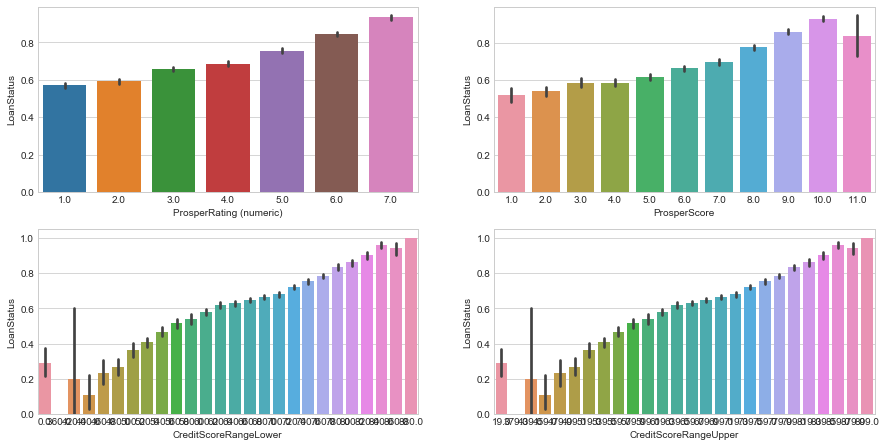

In [29]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.barplot(x="ProsperRating (numeric)", y="LoanStatus", data=df_historical)

ax2 = fig.add_subplot(222)
sns.barplot(x="ProsperScore", y="LoanStatus", data=df_historical)

ax3 = fig.add_subplot(223)
sns.barplot(x="CreditScoreRangeLower", y="LoanStatus", data=df_historical)

ax4 = fig.add_subplot(224)
sns.barplot(x="CreditScoreRangeUpper", y="LoanStatus", data=df_historical)

In [30]:
credit_score_range = df_historical["CreditScoreRangeUpper"] - df_historical["CreditScoreRangeLower"]
credit_score_range.value_counts()

19.0    57361
dtype: int64

In [31]:
df_historical.drop("CreditScoreRangeUpper", axis=1, inplace=True)

df_historical.rename(index=str, columns={"CreditScoreRangeLower": "CreditScore"}, inplace=True)

#### 雇佣时间/状态与借贷状态之间的联系很少，求它们的相关度，看能否进行删除
通过之前的EDA探索，发现雇佣时间与借贷状态之间的联系很少，于是在这里求出两者之间的相关度，从结果可以看出相关度很小，则进行删除。

In [32]:
df_historical.dropna(subset=["EmploymentStatusDuration"], inplace=True)

x = df_historical["EmploymentStatusDuration"]
y = df_historical["LoanStatus"]

r, p = st.pearsonr(x, y)

print("The correlation between employment status duration and loan default is {}".format(r))

The correlation between employment status duration and loan default is -0.0060146981498065905


In [33]:
df_historical.drop("EmploymentStatusDuration", axis=1, inplace=True)

In [34]:
df_historical.drop("EmploymentStatus", axis=1, inplace=True)

#### 有些特征变量，是对平台的评估，而与借款人关系不大，因此进行删除

In [35]:
df_historical.drop(["LenderYield", "EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn"],axis=1, inplace=True)

In [36]:
df_historical.shape

(49746, 45)

### 2.对数据进行筛选
因为09年07月前后的差别较大，很多评估指标进行了更改，而我们只希望知道最近的情况对未来作出预测，因此这里把09年07月前的数据进行排除。

最大的差异就在于评估指标的变化，其中包括ProsperRating (numeric)，在09年07月前ProsperRating (numeric)是不存在的。

In [37]:
df_historical.dropna(subset=["ProsperRating (numeric)"],inplace=True)
df_historical.shape

(28268, 45)

In [38]:
# CreditGrade是在09年7月前使用的评估指标，因此进行删除
df_historical.drop('CreditGrade',axis=1,inplace=True)

In [39]:
df_historical_aft = df_historical.to_csv('df_historical_aft.csv')

---------------------------------------------------------------------------

In [64]:
import numpy as np
import pandas as pd
#Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


df_historical_aft = pd.read_csv('df_historical_aft.csv',index_col=0)
df_historical_aft.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,IsBorrowerHomeowner,CreditScore,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
12,36,0,0.17969,0.1435,5.0,B,4.0,1,AL,Sales - Retail,False,680.0,8,290.0,1.0,4.0,0.0,0.0,0.0,8624.0,0.70,3626.0,20.0,1.00,0.0,0.18,"$25,000-49,999",True,2416.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125045,4000,137.39,1.0,0,0,0.0,1
15,36,0,0.35797,0.3177,1.0,HR,5.0,13,FL,Other,True,700.0,5,300.0,0.0,1.0,0.0,0.0,0.0,9103.0,0.97,178.0,17.0,0.94,0.0,0.49,"$50,000-74,999",True,5500.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63982,4000,173.71,1.0,0,0,0.0,10
23,36,0,0.28032,0.2419,3.0,D,5.0,15,IL,Skilled Labor,False,680.0,5,245.0,0.0,0.0,0.0,0.0,0.0,7975.0,0.84,607.0,22.0,1.00,0.0,0.39,"$25,000-49,999",True,2500.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89204,2000,78.67,1.0,0,0,0.0,30
26,60,1,0.30748,0.2809,2.0,E,3.0,1,NY,Sales - Commission,False,660.0,6,95.0,2.0,3.0,0.0,0.0,0.0,2033.0,0.30,3619.0,10.0,1.00,1.0,0.11,"$25,000-49,999",True,3885.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85538,4000,124.76,1.0,0,0,0.0,37
27,36,1,0.11296,0.0920,6.0,A,9.0,1,CO,Executive,True,700.0,11,294.0,2.0,8.0,0.0,0.0,0.0,7246.0,0.09,30794.0,40.0,1.00,2.0,0.26,"$75,000-99,999",True,6666.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43110,4000,0.00,1.0,0,0,0.0,121


### 3. 把bool类型的特征转换成数值
True为1，False为0

In [65]:
df_historical_aft["IsBorrowerHomeowner"] = df_historical_aft["IsBorrowerHomeowner"].astype(int)
df_historical_aft["IncomeVerifiable"] = df_historical_aft["IncomeVerifiable"].astype(int)

df_historical_aft["IsBorrowerHomeowner"][:10], df_historical_aft["IncomeVerifiable"][:10]


(12    0
 15    1
 23    0
 26    0
 27    1
 30    0
 33    0
 57    1
 67    0
 72    0
 Name: IsBorrowerHomeowner, dtype: int64, 12    1
 15    1
 23    1
 26    1
 27    1
 30    1
 33    1
 57    1
 67    1
 72    1
 Name: IncomeVerifiable, dtype: int64)

### 4. 把非数值特征转换成数值特征
通常，学习算法都预期输入是数字，这就需要转换非数字特征（称为分类变量）。一种转换分类变量的常见方式是独热编码方法。独热编码会为每个非数字特征的每个可能类别创建一个_“虚拟”_变量。例如，假设 someFeature 有三个潜在条目：A、B 或 C。我们将此特征编码为 someFeature_A、someFeature_B 和 someFeature_C。
这里使用 pandas.get_dummies()，为每个非数字特征的每个可能类别创建一个虚拟变量。

In [66]:
df_historical_aft = pd.get_dummies(df_historical_aft)
df_historical_aft.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),IsBorrowerHomeowner,CreditScore,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,...,Occupation_Other,Occupation_Pharmacist,Occupation_Pilot - Private/Commercial,Occupation_Police Officer/Correction Officer,Occupation_Postal Service,Occupation_Principal,Occupation_Professional,Occupation_Professor,Occupation_Psychologist,Occupation_Realtor,Occupation_Religious,Occupation_Retail Management,Occupation_Sales - Commission,Occupation_Sales - Retail,Occupation_Scientist,Occupation_Skilled Labor,Occupation_Social Worker,Occupation_Student - College Freshman,Occupation_Student - College Graduate Student,Occupation_Student - College Junior,Occupation_Student - College Senior,Occupation_Student - College Sophomore,Occupation_Student - Community College,Occupation_Student - Technical School,Occupation_Teacher,Occupation_Teacher's Aide,Occupation_Tradesman - Carpenter,Occupation_Tradesman - Electrician,Occupation_Tradesman - Mechanic,Occupation_Tradesman - Plumber,Occupation_Truck Driver,Occupation_Unknown,Occupation_Waiter/Waitress,IncomeRange_$0,"IncomeRange_$1-24,999","IncomeRange_$100,000+","IncomeRange_$25,000-49,999","IncomeRange_$50,000-74,999","IncomeRange_$75,000-99,999",IncomeRange_Not employed
12,36,0,0.17969,0.1435,5.0,4.0,1,0,680.0,8,290.0,1.0,4.0,0.0,0.0,0.0,8624.0,0.70,3626.0,20.0,1.00,0.0,0.18,1,2416.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125045,4000,137.39,1.0,0,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
15,36,0,0.35797,0.3177,1.0,5.0,13,1,700.0,5,300.0,0.0,1.0,0.0,0.0,0.0,9103.0,0.97,178.0,17.0,0.94,0.0,0.49,1,5500.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63982,4000,173.71,1.0,0,0,0.0,10,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23,36,0,0.28032,0.2419,3.0,5.0,15,0,680.0,5,245.0,0.0,0.0,0.0,0.0,0.0,7975.0,0.84,607.0,22.0,1.00,0.0,0.39,1,2500.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89204,2000,78.67,1.0,0,0,0.0,30,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
26,60,1,0.30748,0.2809,2.0,3.0,1,0,660.0,6,95.0,2.0,3.0,0.0,0.0,0.0,2033.0,0.30,3619.0,10.0,1.00,1.0,0.11,1,3885.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85538,4000,124.76,1.0,0,0,0.0,37,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
27,36,1,0.11296,0.0920,6.0,9.0,1,1,700.0,11,294.0,2.0,8.0,0.0,0.0,0.0,7246.0,0.09,30794.0,40.0,1.00,2.0,0.26,1,6666.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43110,4000,0.00,1.0,0,0,0.0,121,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### 5. 对特征进行标准化处理
由于不同特征的范围不同，会导致算法在处理时的权重不同，现采用MinMaxScaler的方法把值转换成0～1之间。

In [67]:
scaler = MinMaxScaler()
scaler.fit_transform(df_historical_aft)

array([[ 0.5       ,  0.        ,  0.3540146 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5       ,  0.        ,  0.82550513, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.5       ,  0.        ,  0.62014704, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.5       ,  1.        ,  0.6797313 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.5       ,  0.        ,  0.22841955, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  1.        ,  0.63009098, ...,  0.        ,
         0.        ,  0.        ]])

In [68]:
df_historical_aft.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),IsBorrowerHomeowner,CreditScore,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,...,Occupation_Other,Occupation_Pharmacist,Occupation_Pilot - Private/Commercial,Occupation_Police Officer/Correction Officer,Occupation_Postal Service,Occupation_Principal,Occupation_Professional,Occupation_Professor,Occupation_Psychologist,Occupation_Realtor,Occupation_Religious,Occupation_Retail Management,Occupation_Sales - Commission,Occupation_Sales - Retail,Occupation_Scientist,Occupation_Skilled Labor,Occupation_Social Worker,Occupation_Student - College Freshman,Occupation_Student - College Graduate Student,Occupation_Student - College Junior,Occupation_Student - College Senior,Occupation_Student - College Sophomore,Occupation_Student - Community College,Occupation_Student - Technical School,Occupation_Teacher,Occupation_Teacher's Aide,Occupation_Tradesman - Carpenter,Occupation_Tradesman - Electrician,Occupation_Tradesman - Mechanic,Occupation_Tradesman - Plumber,Occupation_Truck Driver,Occupation_Unknown,Occupation_Waiter/Waitress,IncomeRange_$0,"IncomeRange_$1-24,999","IncomeRange_$100,000+","IncomeRange_$25,000-49,999","IncomeRange_$50,000-74,999","IncomeRange_$75,000-99,999",IncomeRange_Not employed
12,36,0,0.17969,0.1435,5.0,4.0,1,0,680.0,8,290.0,1.0,4.0,0.0,0.0,0.0,8624.0,0.70,3626.0,20.0,1.00,0.0,0.18,1,2416.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125045,4000,137.39,1.0,0,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
15,36,0,0.35797,0.3177,1.0,5.0,13,1,700.0,5,300.0,0.0,1.0,0.0,0.0,0.0,9103.0,0.97,178.0,17.0,0.94,0.0,0.49,1,5500.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63982,4000,173.71,1.0,0,0,0.0,10,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23,36,0,0.28032,0.2419,3.0,5.0,15,0,680.0,5,245.0,0.0,0.0,0.0,0.0,0.0,7975.0,0.84,607.0,22.0,1.00,0.0,0.39,1,2500.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89204,2000,78.67,1.0,0,0,0.0,30,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
26,60,1,0.30748,0.2809,2.0,3.0,1,0,660.0,6,95.0,2.0,3.0,0.0,0.0,0.0,2033.0,0.30,3619.0,10.0,1.00,1.0,0.11,1,3885.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85538,4000,124.76,1.0,0,0,0.0,37,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
27,36,1,0.11296,0.0920,6.0,9.0,1,1,700.0,11,294.0,2.0,8.0,0.0,0.0,0.0,7246.0,0.09,30794.0,40.0,1.00,2.0,0.26,1,6666.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43110,4000,0.00,1.0,0,0,0.0,121,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
### 6. 数据拆分
把数据拆分成features和label。再拆分成训练集和测试集

In [69]:
X = df_historical_aft.drop("LoanStatus", axis=1)
y = df_historical_aft["LoanStatus"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

-----------------------------------------------------
## 五. 模型构建和评估

### 1 评估指标的选择

训练分类器之前，首先考虑哪些指标能够量化不同分类器性能。虽然从一般意义上讲，我们试图准确预测（或分类）哪些贷款将成为坏账，哪些贷款将全部偿还，但真正的目标是尽可能减少会成为坏账的贷款。因此，我们的目标实际上是尽可能多地将坏账分类正确，即使这意味着偶尔将未坏账的贷款分类为坏账。即使以精确性为代价，也要使坏账分类实现最大化召回。召回率将成为最相关的指标。



### 2 模型选择
使用随机森林的原因是因为它有以下优点：

1. 能够处理多特征数据
2. 不用做特征选择，能自动确定哪些特征比较重要
3. 容易实现，计算开销少
4. 对缺失值数据进行估计时，随机森林是十分有效的方法，如果有很大一部分特征遗失，仍可以维持准确度。

随机森林是以普通决策树作为基学习器，把多个决策树结合在一起，在训练过程中进行随机属性选择。（随机森林会随机选择指定数量的属性，再从这些属性中挑选出最优属性进行划分）。

随机森林中基学习器的多样性不仅来自样本扰动，还来自属性扰动。

### 3 参数选择
网格搜索，交叉验证

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, recall_score, precision_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)

parameters = {'max_depth': range(2,6), 'criterion':['gini', 'entropy']}

scorer = make_scorer(fbeta_score, beta=1.5)

grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

predictions  = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)


print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 1.5)))
print("Final recall_score on the testing data: {:.4f}".format(recall_score(y_test, best_predictions)))
print("Final precision_score on the testing data: {:.4f}".format(precision_score(y_test, best_predictions)))
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))

Final F-score on the testing data: 0.8818
Final recall_score on the testing data: 0.9997
Final precision_score on the testing data: 0.6969
Final accuracy score on the testing data: 0.6969
